In [180]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


mongo_logs_go = "logs_mongo_go_4.txt"
mongo_logs_rust = "logs_mongo_rust_5.txt"

df_go = pd.read_csv (mongo_logs_go, names = ["timestamp", "level", "parallel_tasks", "latency"])
df_rust = pd.read_csv (mongo_logs_rust, names = ["timestamp", "level", "parallel_tasks", "latency"])


In [181]:
list1 = []
list1 = df_go["latency"].tolist()
listMDB = []
for x in list1:
    listMDB.append(x.split(" "))
listMDB2 = []
for x in listMDB:
    match = re.match(r"([\d.]+)([a-zA-Zµ]+)", x[-1])
    if match.group(2) == "s":
        listMDB2.append(float(match.group(1))*1000)
    elif match.group(2) == "µsms":
        listMDB2.append(float(match.group(1))/1000)
    elif match.group(2) == "ns":
        listMDB2.append(float(match.group(1))/1000/1000)
    else:
        listMDB2.append(float(match.group(1)))
lats_go = np.array(listMDB2)



list1 = []
list1 = df_rust["latency"].tolist()
listMDB = []
for x in list1:
    listMDB.append(x.split(" "))
listMDB2 = []
for x in listMDB:
    match = re.match(r"([\d.]+)([a-zA-Zµ]+)", x[-1])
    if match.group(2) == "s":
        listMDB2.append(float(match.group(1))*1000)
    elif match.group(2) == "µs":
        listMDB2.append(float(match.group(1))/1000)
    elif match.group(2) == "ns":
        listMDB2.append(float(match.group(1))/1000/1000)
    else:
        listMDB2.append(float(match.group(1)))
lats_rust = np.array(listMDB2)


In [182]:
mean_lats_go = []
used = 0

for x in range (1, 11, 1):
    y = np.mean(lats_go[used:x*100+used])
    mean_lats_go.append(y)
    used += x*100



mean_lats_rust = []
used = 0

for x in range (1, 11, 1):
    y = np.mean(lats_rust[used:x*100+used])
    mean_lats_rust.append(y)
    print(x*100+used)
    used += x*100
    
    
x = range(1,11,1)


100
300
600
1000
1500
2100
2800
3600
4500
5500


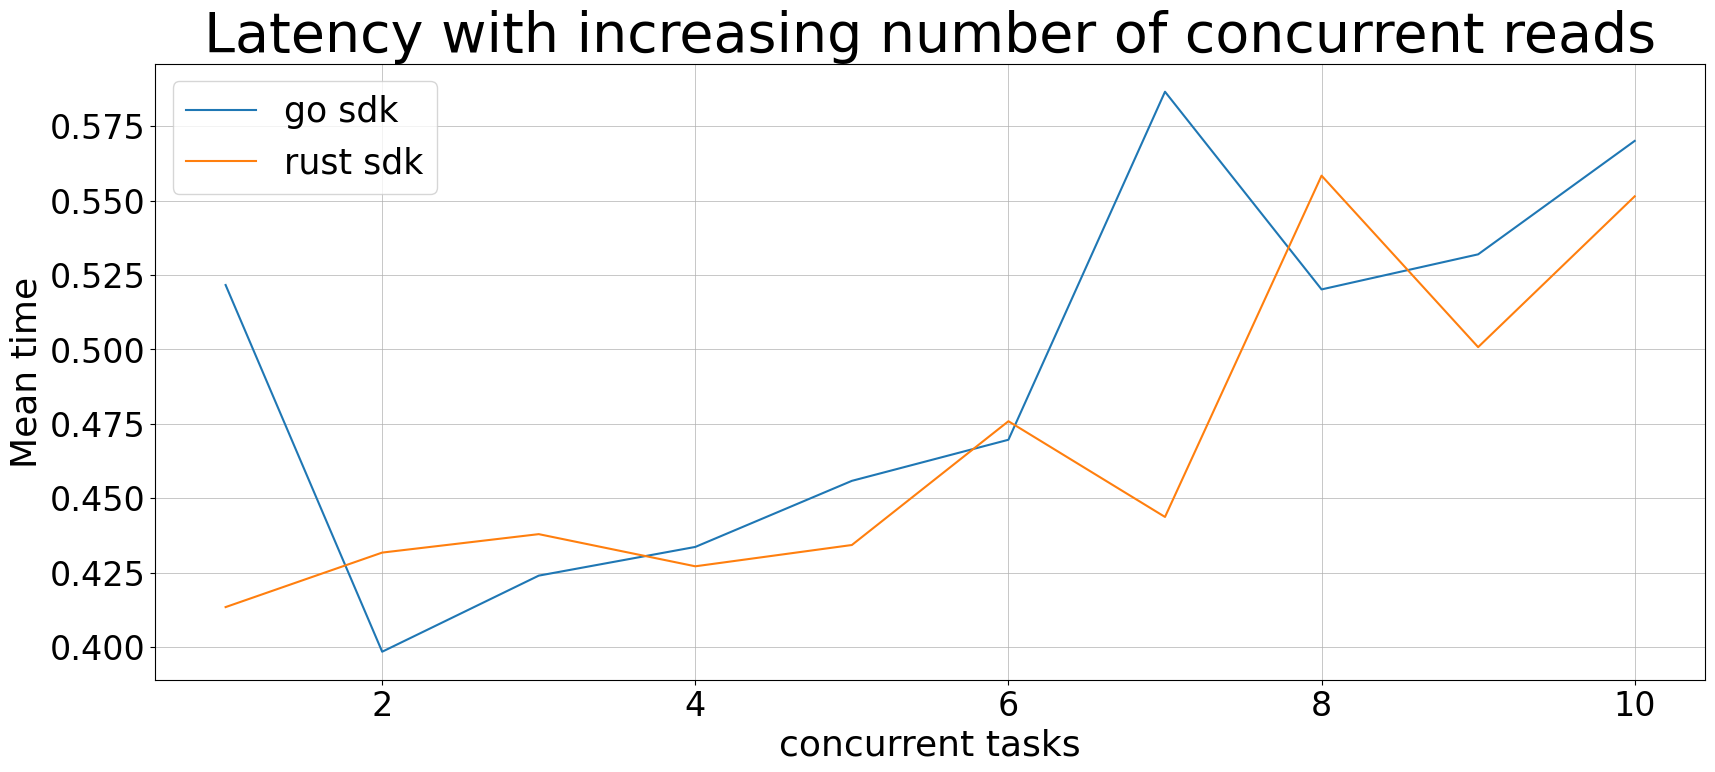

In [183]:
fig, ax = plt.subplots(figsize = (20,8)) 
ax.set_title("Latency with increasing number of concurrent reads", fontsize = 40)
ax.set_xlabel('concurrent tasks', fontsize = 26)
ax.set_ylabel('Mean time', fontsize = 26)
ax.plot(x, mean_lats_go, label = "go sdk")
ax.plot(x, mean_lats_rust, label = "rust sdk")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.grid(True, linewidth=0.5)
#ax.set_xticks(range(5,21,5))
#plt.yscale('log')
plt.legend(loc = 'upper left')
plt.rc('legend', fontsize = 25)
plt.show() 